# Pytorch 简介
## 与python完美融合

### 张量计算
#### 定义张量

In [1]:
import torch
x = torch.rand(5,3)

In [2]:
x

tensor([[0.0901, 0.6681, 0.4470],
        [0.1199, 0.9135, 0.3371],
        [0.5274, 0.7277, 0.7686],
        [0.9402, 0.6311, 0.0741],
        [0.4828, 0.1339, 0.0430]])

In [3]:
y = torch.ones(5,3)

In [4]:
y

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [5]:
z = torch.zeros(2,5,3)

In [6]:
z

tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]])

#### 访问张量

In [7]:
z[0]

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [8]:
# 访问第2行第3列的数字
x[1,2]

tensor(0.3371)

In [9]:
# 访问第三列
x[:,2]

tensor([0.4470, 0.3371, 0.7686, 0.0741, 0.0430])

In [10]:
z = x+y

In [11]:
z

tensor([[1.0901, 1.6681, 1.4470],
        [1.1199, 1.9135, 1.3371],
        [1.5274, 1.7277, 1.7686],
        [1.9402, 1.6311, 1.0741],
        [1.4828, 1.1339, 1.0430]])

#### 张量运算

In [12]:
# 矩阵相乘 mm命令
q = x.mm(y.t())
# y.t() 表示y的转置

In [13]:
q

tensor([[1.2052, 1.2052, 1.2052, 1.2052, 1.2052],
        [1.3705, 1.3705, 1.3705, 1.3705, 1.3705],
        [2.0238, 2.0238, 2.0238, 2.0238, 2.0238],
        [1.6453, 1.6453, 1.6453, 1.6453, 1.6453],
        [0.6597, 0.6597, 0.6597, 0.6597, 0.6597]])

#### 张量与Numpy数组的转换

In [14]:
import numpy as np

In [15]:
x_tensor = torch.randn(2,3)
y_numpy = np.random.randn(2,3)

In [16]:
x_tensor

tensor([[ 0.9403, -1.0692,  1.8048],
        [-0.4743,  0.4447, -1.6102]])

In [17]:
y_numpy

array([[ 0.75218454,  1.23346954, -0.25574512],
       [ 0.90845944,  1.42904999,  1.03170517]])

In [18]:
x_numpy = x_tensor.numpy()

In [19]:
y_tensor = torch.from_numpy(y_numpy)

In [20]:
# torch.FloatTensor(a) 将a转换为float类型
# torch.LongTensor(a) 将a转换为整数类型

#### GPU上的张量运算

In [21]:
x = x.cuda()
y = y.cuda()
print(x+y)

tensor([[1.0901, 1.6681, 1.4470],
        [1.1199, 1.9135, 1.3371],
        [1.5274, 1.7277, 1.7686],
        [1.9402, 1.6311, 1.0741],
        [1.4828, 1.1339, 1.0430]], device='cuda:0')


In [22]:
x = x.cpu()

### 动态计算图

In [23]:
# 普通的张量同时也是自动微分变量
x = torch.ones((2,2),requires_grad = True)

In [24]:
y = x+2

In [25]:
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [26]:
y.data

tensor([[3., 3.],
        [3., 3.]])

In [27]:
y.grad_fn

In [28]:
z = y*y

In [29]:
z.grad_fn

In [30]:
t = torch.mean(z)

In [31]:
t.grad_fn

In [32]:
t.backward()

In [33]:
#print(z.grad)
#print(y.grad)
print(x.grad)

tensor([[1.5000, 1.5000],
        [1.5000, 1.5000]])


In [34]:
### Pytorch实例：预测房价

# 构造0-100之间的均匀数字作为时间变量x
x = torch.linspace(0,100).type(torch.FloatTensor)

C:\Users\A\anaconda3\envs\Pytorch-gpu\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  ..\aten\src\ATen\native\RangeFactories.cpp:25.)
  after removing the cwd from sys.path.


In [35]:
rand = torch.randn(100)*10

In [36]:
y = x + rand

In [37]:
x_train = x[:-10]
x_test = x[-10:]
y_train = y[:-10]
y_test = y[-10:]

In [38]:
%matplotlib inline
#import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


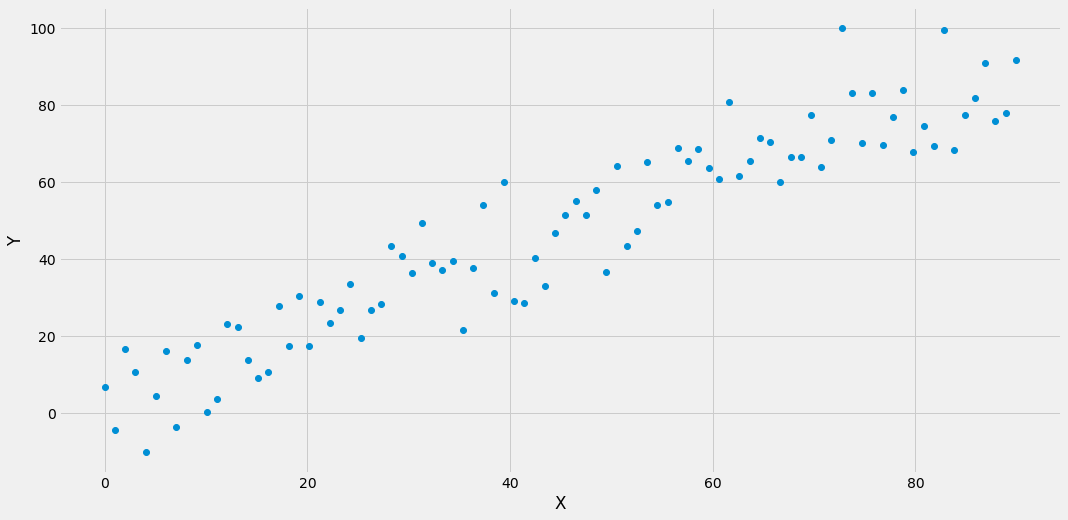

In [39]:

plt.figure(figsize = (16,8))

plt.xlabel('X')
plt.ylabel('Y')

plt.plot(x_train.numpy(),y_train.numpy(),'o')
plt.show()

In [40]:
# 使用直线进行拟合
# 损失函数定义为平均损失函数
# 使用梯度下降法进行迭代计算

In [41]:
a = torch.rand((1),requires_grad = True)
b = torch.rand((1),requires_grad = True)

In [42]:
learning_rate = 0.0001

In [43]:
# 对a和b进行迭代计算

for i in range(1000):
    predictions = a.expand_as(x_train)*x_train+b.expand_as(x_train)
    loss = torch.mean((predictions - y_train)**2)
    print('loss:',loss)
    loss.backward()
    # 使用梯度信息更新a,b的值
    a.data.add_(-learning_rate*a.grad.data)
    b.data.add_(-learning_rate*b.grad.data)
    # 清空储存在变量a，b中的梯度信息
    a.grad.data.zero_()
    b.grad.data.zero_()

# expand_as用于扩充维度
# pytorch如果函数后加上了_，表示用这个函数计算结果更新之前变量

loss: tensor(300.8612, grad_fn=<MeanBackward0>)
loss: tensor(129.9038, grad_fn=<MeanBackward0>)
loss: tensor(94.0373, grad_fn=<MeanBackward0>)
loss: tensor(86.5125, grad_fn=<MeanBackward0>)
loss: tensor(84.9336, grad_fn=<MeanBackward0>)
loss: tensor(84.6022, grad_fn=<MeanBackward0>)
loss: tensor(84.5325, grad_fn=<MeanBackward0>)
loss: tensor(84.5177, grad_fn=<MeanBackward0>)
loss: tensor(84.5145, grad_fn=<MeanBackward0>)
loss: tensor(84.5136, grad_fn=<MeanBackward0>)
loss: tensor(84.5132, grad_fn=<MeanBackward0>)
loss: tensor(84.5130, grad_fn=<MeanBackward0>)
loss: tensor(84.5127, grad_fn=<MeanBackward0>)
loss: tensor(84.5125, grad_fn=<MeanBackward0>)
loss: tensor(84.5123, grad_fn=<MeanBackward0>)
loss: tensor(84.5121, grad_fn=<MeanBackward0>)
loss: tensor(84.5118, grad_fn=<MeanBackward0>)
loss: tensor(84.5116, grad_fn=<MeanBackward0>)
loss: tensor(84.5114, grad_fn=<MeanBackward0>)
loss: tensor(84.5112, grad_fn=<MeanBackward0>)
loss: tensor(84.5109, grad_fn=<MeanBackward0>)
loss: tenso

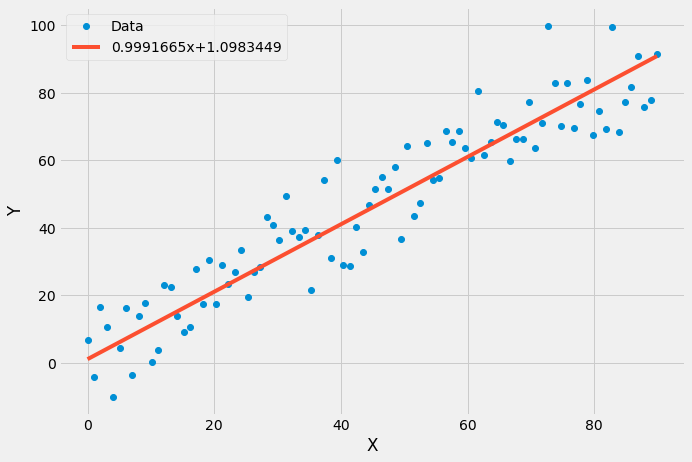

In [44]:
# 绘图
x_data = x_train.data.numpy()
plt.figure(figsize = (10,7))
xplot, = plt.plot(x_data, y_train.data.numpy(),'o')
yplot, = plt.plot(x_data, a.data.numpy()*x_data + b.data.numpy())
plt.xlabel('X')
plt.ylabel('Y')
str1 = str(a.data.numpy()[0])+'x+'+str(b.data.numpy()[0])
plt.legend([xplot,yplot],['Data',str1])
plt.show()

# a.data.numpy(0)指数字

In [45]:
predictions = a.expand_as(x_test) * x_test + b.expand_as(x_test) #计算模型的预测结果

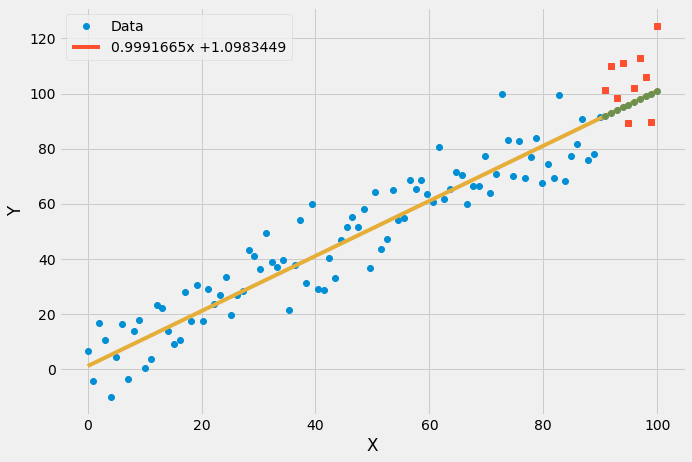

In [46]:
x_data = x_train.data.numpy() # 获得x包裹的数据
x_pred = x_test.data.numpy()
plt.figure(figsize = (10, 7)) #设定绘图窗口大小
plt.plot(x_data, y_train.data.numpy(), 'o') # 绘制训练数据
plt.plot(x_pred, y_test.data.numpy(), 's') # 绘制测试数据
x_data = np.r_[x_data, x_test.data.numpy()]
plt.plot(x_data, a.data.numpy() * x_data + b.data.numpy())  #绘制拟合数据
plt.plot(x_pred, a.data.numpy() * x_pred + b.data.numpy(), 'o') #绘制预测数据
plt.xlabel('X') #更改坐标轴标注
plt.ylabel('Y') #更改坐标轴标注
str1 = str(a.data.numpy()[0]) + 'x +' + str(b.data.numpy()[0]) #图例信息
plt.legend([xplot, yplot],['Data', str1]) #绘制图例
plt.show()
